In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import xarray as xr 
import os
import geopandas as gpd
import shapely
import cmasher as cmr
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd
import h5py
import sys
from msc_thesis_functions import *
del sys.modules['msc_thesis_functions']
from msc_thesis_functions import *

from pyproj import Transformer
transformer = Transformer.from_crs(4326, 3413, always_xy=True)

import matplotlib.font_manager as font_manager
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

font_path= '/Users/torka/Library/Fonts/FiraSans-Light.ttf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

In [5]:
sites = [2,3,4,'grid3','grid4','grid5','grid6','grid7','grid8']

paths_MP = [
    # '/Users/torka/Library/CloudStorage/OneDrive-Personal/MarineSciences/MasterThs-T/Data/CryoVEx2014_SEAICE_GROUNDDATA_V1/NORD_CAMP_TRANSECT.csv', #CRYOVEX 2014
    '/Users/torka/Library/CloudStorage/OneDrive-Personal/MarineSciences/MasterThs-T/Data/ECCCEureka2014.h5', #EUREKA 2014
    '/Users/torka/Library/CloudStorage/OneDrive-Personal/MarineSciences/MasterThs-T/Data/Eureka/ECCC_2016_Eureka_Magnaprobe.csv' #EUREKA 2016
]

# for year, path_MP in zip(['2014', '2016'], paths_MP):
#     # load magnaprobe in situ data

#     filetype = path_MP.split('.')[1]
#     df_dict = open_data(path_MP, filetype=filetype, mode='dict', instrument='MP')

#     if year == '2014':
#         f = h5py.File(path_MP, 'r')
#         group = f['eureka_data']
#         data = group['magnaprobe']
#         df_df = pd.DataFrame({'lat':data['latitude'][()], 'lon':data['longitude'][()], 'snow_depth':data['snow_depth'][()], 'site_id':data['site_id'][()]})
#         df_df.loc[df_df['lon'] < 0, 'lon'] += 360
#         df_df['ice_type'] = ['fyi']*len(df_df)
#         df_df = df_df.loc[(df_df['site_id'] == 2) | (df_df['site_id'] == 3) | (df_df['site_id'] == 4)] 
#         df_df.reset_index(drop=True, inplace=True)
        
#     elif year == '2016':
#         for key in ['grid3','grid4', 'grid5','grid6','grid7','grid8']:
#             if not df_df.empty:
#                 df_df = pd.concat([df_df, df_dict[key]])
                
#     df_df['x'], df_df['y'] = transformer.transform(df_df['lon'], df_df['lat'])

#     sites = df_df['site_id'].unique()


path_to_outlines = '/Users/torka/Library/CloudStorage/OneDrive-Personal/MarineSciences/MasterThs-T/Data/Eureka/grid_extents_v3'
files = os.listdir(path_to_outlines) 
files = np.sort([f for f in files if f.endswith('.shp')])
shape_dict = {}
for f, site in zip(files,sites):
    shape_dict[site] = gpd.read_file(path_to_outlines + '/' + f)

path_to_data = '/Users/torka/Library/CloudStorage/OneDrive-Personal/MarineSciences/MasterThs-T/Data/OIB/ATM_gridded/gridding_v7'
files = os.listdir(path_to_data) 
files = np.sort([f for f in files if f.endswith('.nc')])
ATM_dict = {}
for f,site in zip(files,sites):
    print(f)
    ATM_dict[site] = xr.open_dataset(os.path.join(path_to_data,f))  
    ATM_dict[site] = ATM_dict[site].rio.set_spatial_dims(x_dim='easting', y_dim='northing')


EUREKA2014_ATM_gridded_2.nc
EUREKA2014_ATM_gridded_3.nc
EUREKA2014_ATM_gridded_4.nc
EUREKA2016_ATM_gridded_grid3.nc
EUREKA2016_ATM_gridded_grid4.nc
EUREKA2016_ATM_gridded_grid5.nc
EUREKA2016_ATM_gridded_grid6.nc
EUREKA2016_ATM_gridded_grid7.nc
EUREKA2016_ATM_gridded_grid8.nc


/opt/anaconda3/envs/landlab/lib/python3.10/site-packages/xarray/core/duck_array_ops.py:215: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)
/opt/anaconda3/envs/landlab/lib/python3.10/site-packages/xarray/core/duck_array_ops.py:215: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)
/opt/anaconda3/envs/landlab/lib/python3.10/site-packages/xarray/core/duck_array_ops.py:215: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)
/var/folders/33/mb4rwg392ds1fw9l8rx1tnp80000gn/T/ipykernel_48393/2032043190.py:154: UserWarning: The figure layout has changed to tight
  fig.tight_layout(h_pad=-25, w_pad=2)


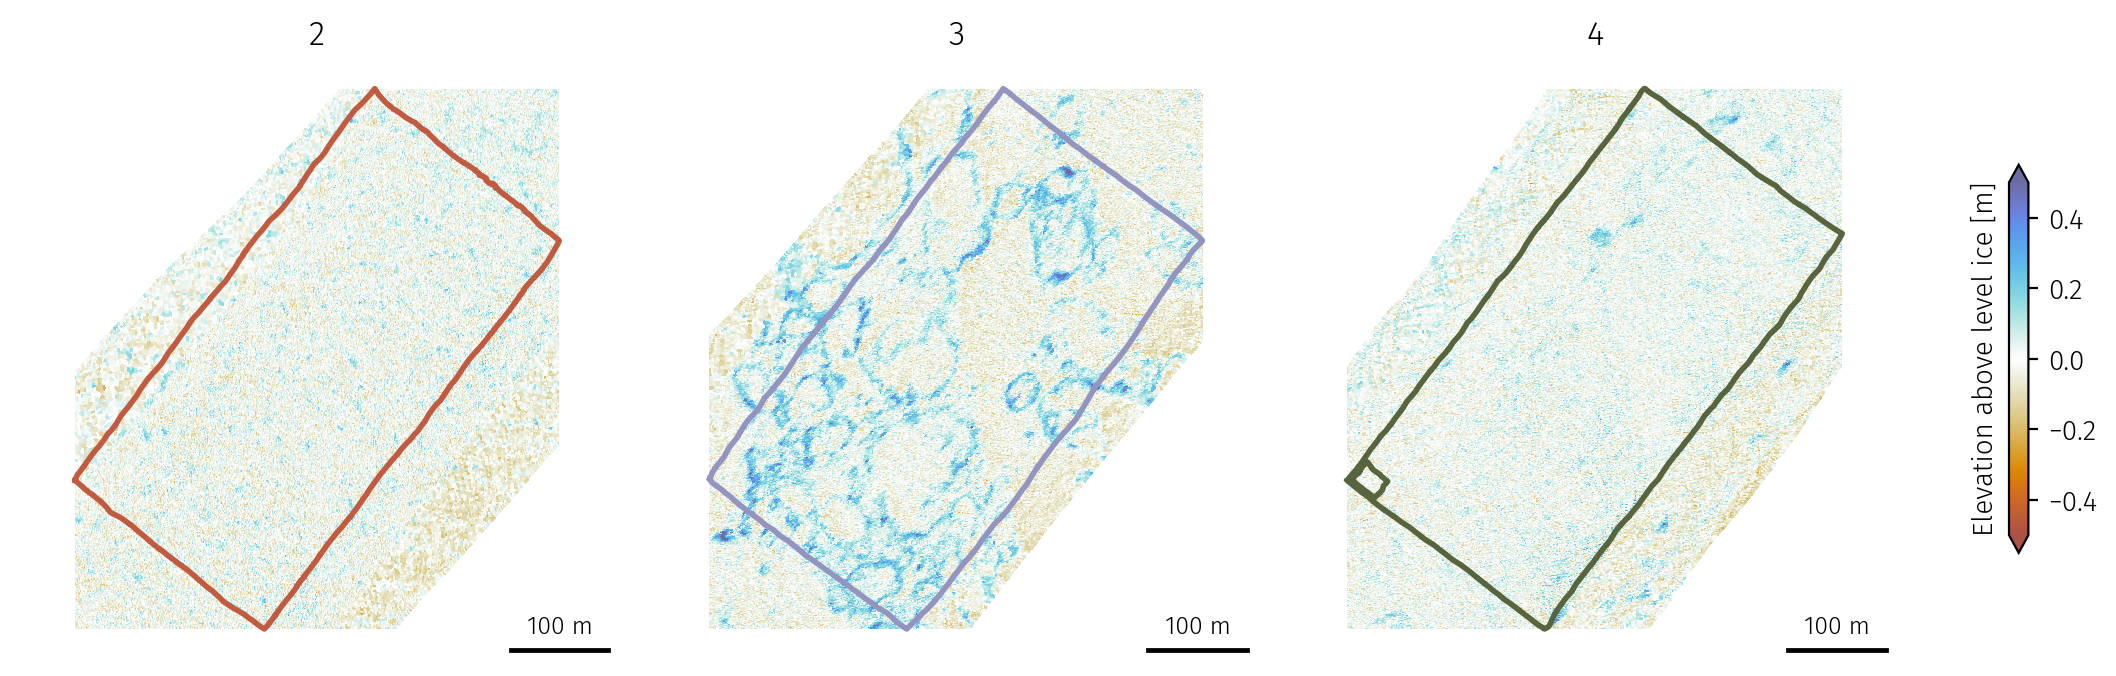

In [ ]:
norm = mcolors.Normalize(vmin=-.5, vmax=.5)
colors =  ["#c25a40",
"#9494c1",
"#58643d"]
sites_2014 = [2,3,4]
fig, ax = plt.subplots(1,3,figsize=(12,10), constrained_layout=True, dpi=200)   
ax = ax.ravel()
insets = [None]*len(ax)

for ind in range(len(ax)):
    ax[ind].set_aspect('equal')
    ax[ind].set_title(sites_2014[ind])
    ax[ind].axis('off')
    
    # if ind == 2:
    #     insets[ind] = ax[ind].inset_axes([0.7, 0.7, 0.3, 0.3])
    # else:
    # insets[ind] = ax[ind].inset_axes([-0.15, 0.8, 0.3, 0.3])
    # insets[ind].set_xlim(0,.75)
    # insets[ind].set_ylim(0,20)
    # insets[ind].set_xlabel('Snow depth [m]', fontsize=9)
    # insets[ind].tick_params(axis='both', which='major', labelsize=9)
    # insets[ind].spines['top'].set_color('white')
    # insets[ind].spines['right'].set_color('white')
    # insets[ind].grid(ls=':',axis='y')
    
for i, site in enumerate(sites_2014):
    # df_insitu = df_df.loc[df_df['site_id'] == site]
    
    for geom in shape_dict[site].geometry:
        if type(geom) == shapely.geometry.multipolygon.MultiPolygon:
            for j, g in enumerate(geom):
                ax[i].plot(g.exterior.xy[0], g.exterior.xy[1], color=colors[i], lw=2, zorder=100)
                            # ax[0].plot(shape_dict[site].geometry[0].geoms[0].exterior.xy[0], shape_dict[site].geometry[0].geoms[0].exterior.xy[1], color='black', lw=1, zorder=100, label='Site boundary')
        else:
                ax[i].plot(geom.exterior.xy[0], geom.exterior.xy[1], color=colors[i], lw=2, zorder=100, label='Site boundary')
    
    xlim = ax[i].get_xlim()
    
    width = xlim[1] - xlim[0]
    ylim = ax[i].get_ylim()
    height = ylim[1] - ylim[0]
    diff = height - width
    # ax[i].scatter(df_insitu['x'], df_insitu['y'], alpha=.1, s=1,color='grey')
    
    pcol = ax[i].pcolormesh(ATM_dict[site].easting.values, ATM_dict[site].northing.values, ATM_dict[site]['elevation'].values,
                     cmap=cmr.prinsenvlag,
                     norm=norm
                     )
    clipped = ATM_dict[site].rio.clip([shape_dict[site].geometry[0]])
    
    # ax[i].contour(clipped.easting.values, clipped.northing.values, clipped['classes'].values,
    #               linewidths=.754,
    #               colors=colors[i],
    #               levels=[0.5],
    #             #   alpha=.3,
    #               zorder=200
    #               )
    # ax[i].contourf(clipped.easting.values, clipped.northing.values, clipped['classes'].values,
    #               linewidths=.754,
    #               cmap='Greys',
    #               levels=[0.5,1.5],
    #               alpha=.4,
    #               zorder=100
    #               )

    
    if diff > 0:
        ax[i].set_xlim(xlim[0]-diff/2, xlim[1] + diff/2) 
        ax[i].set_ylim(ylim)
    else:
        ax[i].set_xlim(xlim)
        ax[i].set_ylim(ylim[0]-diff/2, ylim[1] + diff/2)

    
    # sns.histplot(kriging_dict[site]['snow_depth'].values[~np.isnan(kriging_dict[site]['snow_depth'].values)],
    #             bins=np.linspace(0,1,25),
    #             stat='percent',
    #             ax=insets[i],
    #             line_kws={'color':None},
    #             color=colors[i]
    #             )
    # sns.kdeplot(kriging_dict[site]['snow_depth'].values[~np.isnan(kriging_dict[site]['elevation'].values)],
    #             # bins=np.linspace(0,1,25),
    #             # stat='percent',
    #             ax=insets[i],
    #             # line_kws={'color':None},
    #             color=colors[i],
    #             label='Kriging'
    #             )
    # sns.kdeplot(df_insitu['snow_depth'],
    #             # bins=np.linspace(0,1,25),
    #             # stat='percent',
    #             ax=insets[i],
    #             # line_kws={'color':None},
    #             color=colors[i],
    #             alpha=.5,
    #             label='Raw'
    #             )
    # insets[i].legend(fontsize=9,
    #                  loc='upper right',
    #                  frameon=False,
    #                  bbox_to_anchor=(2, 1.1)
    #                  )
    
    
    
    # kriging_flag = kriging_dict[site].attrs['kriging_flag'].replace('_',' ').capitalize()
    # if kriging_flag == 'Both':
    #     length_scale_undeformed = kriging_dict[site].attrs['undeformed_range']
    #     length_scale_deformed = kriging_dict[site].attrs['deformed_range']
    #     text = f'Mode: {kriging_flag}\n$L$, undeformed = {length_scale_undeformed:.2f} m\n$L$, deformed = {length_scale_deformed:.2f} m '
        
    # elif kriging_flag == 'Fully undeformed':
    #     length_scale_undeformed = kriging_dict[site].attrs['undeformed_range']
    #     text = f'Mode: {kriging_flag}\n$L$, undeformed = {length_scale_undeformed:.2f} m'
        
    # elif kriging_flag == 'Fully deformed':
    #     length_scale_deformed = kriging_dict[site].attrs['deformed_range']
        # text = f'Mode: {kriging_flag}\n$L$, deformed = {length_scale_deformed:.2f} m'
    
    if site == 'grid5':
        # ax[i].text(0.0,0.3, text, ha='left', va='top', transform=ax[i].transAxes, size=8)
        scalebar = AnchoredSizeBar(ax[i].transData,
                           100, '100 m', 'lower left', 
                        #    pad=-1,
                           color='black',
                           frameon=False,
                           fill_bar=True,
                           size_vertical=2,
                           label_top=True,
                           sep=4,
                           fontproperties=font_manager.FontProperties(family='Fira Sans', size=9)
                           )

    else:    
        # ax[i].text(1.2, 0.19, text, ha='right', va='top', transform=ax[i].transAxes, size=8)
        scalebar = AnchoredSizeBar(ax[i].transData,
                           100, '100 m', 'lower right', 
                        #    pad=,
                           color='black',
                           frameon=False,
                           fill_bar=True,
                           size_vertical=2,
                           label_top=True,
                           sep=4,
                           fontproperties=font_manager.FontProperties(family='Fira Sans', size=9)
                           )
        
        
    ax[i].add_artist(scalebar)
    
    
    
fig.tight_layout(h_pad=-25, w_pad=2)
cbar = fig.colorbar(pcol, ax=ax, orientation='vertical', label='Elevation above level ice [m]', shrink=.2, extend='both')
cbar.ax.yaxis.set_label_position('left')

    # ax[i].plot(shape_dict[site].geometry[0].exterior.xy[0],shape_dict[site].geometry[0].exterior.xy[1])

/var/folders/33/mb4rwg392ds1fw9l8rx1tnp80000gn/T/ipykernel_48393/2319903747.py:160: UserWarning: The figure layout has changed to tight
  fig.tight_layout(h_pad=-15, w_pad=2)


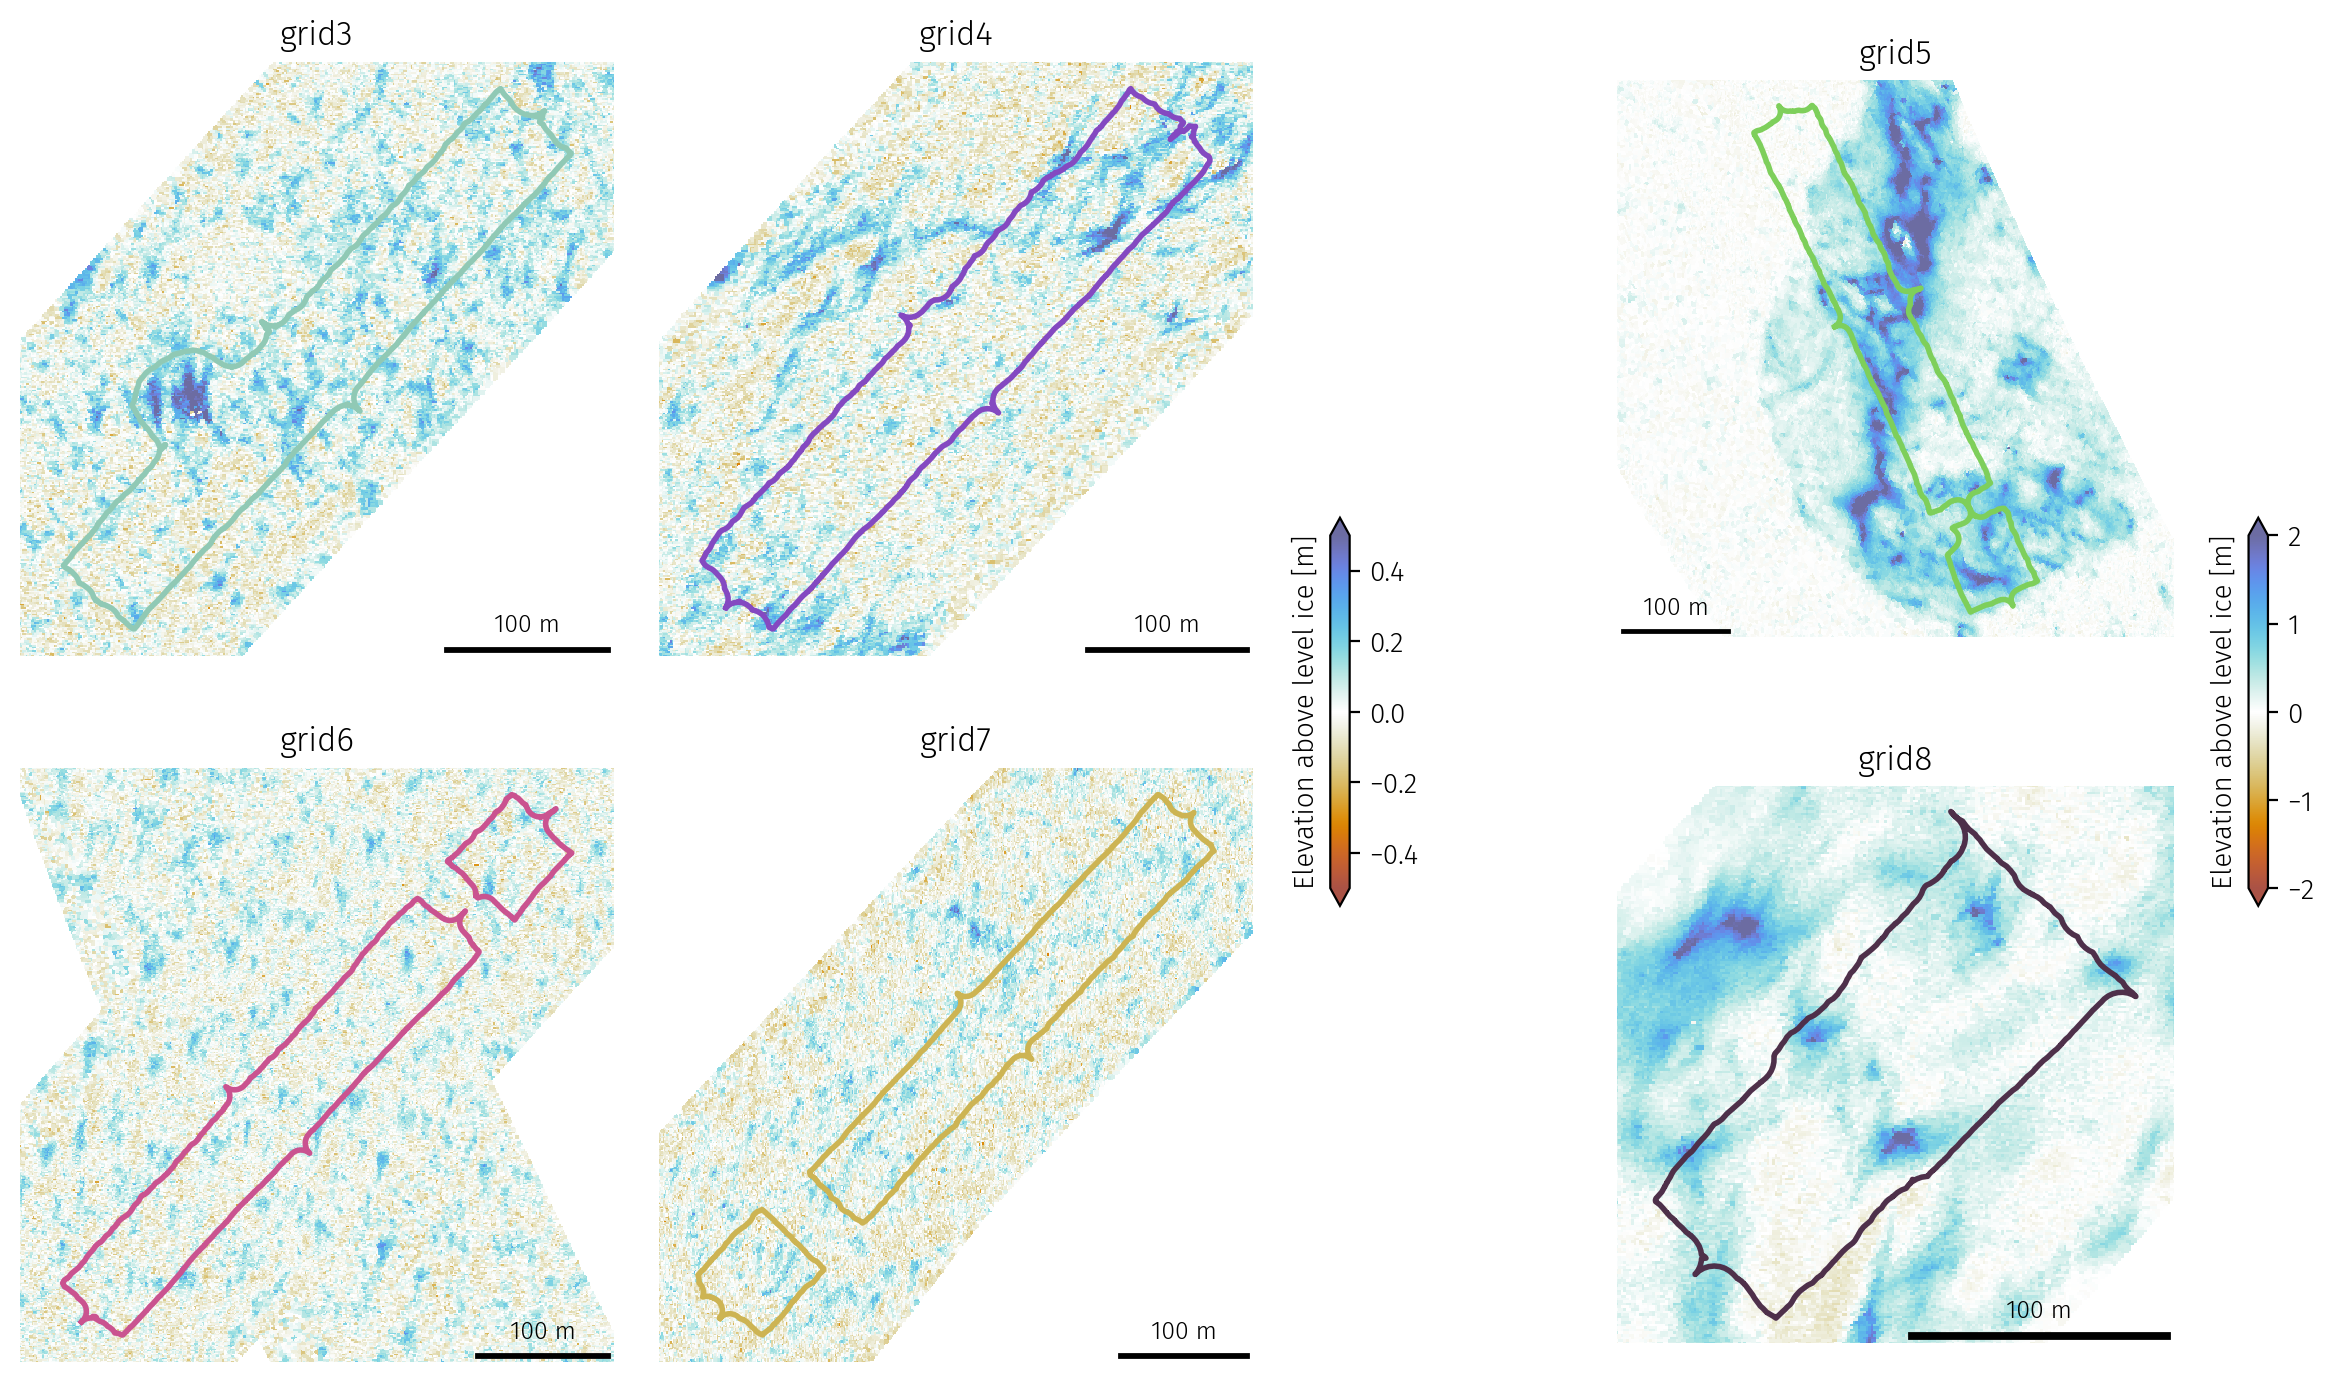

In [37]:

norm1 = mcolors.TwoSlopeNorm(vmin=-2, vcenter=0, vmax=2)
norm2= mcolors.TwoSlopeNorm(vmin=-.5, vcenter=0, vmax=.5)
colors =  ["#90c9b5",
"#8449c1",
"#7ecf5b",
"#ca5390",
"#cdb453","#4e304a",]
sites_2016 = ['grid3','grid4','grid5','grid6','grid7','grid8']
fig, ax = plt.subplots(2,3,figsize=(12,10), constrained_layout=True, dpi=200)   
ax = ax.ravel()
insets = [None]*len(ax)

for ind in range(len(ax)):
    ax[ind].set_aspect('equal')
    ax[ind].set_title(sites_2016[ind])
    ax[ind].axis('off')
    
    # if ind == 2:
    #     insets[ind] = ax[ind].inset_axes([0.7, 0.7, 0.3, 0.3])
    # else:
    # insets[ind] = ax[ind].inset_axes([-0.15, 0.8, 0.3, 0.3])
    # insets[ind].set_xlim(0,.75)
    # insets[ind].set_ylim(0,20)
    # insets[ind].set_xlabel('Snow depth [m]', fontsize=9)
    # insets[ind].tick_params(axis='both', which='major', labelsize=9)
    # insets[ind].spines['top'].set_color('white')
    # insets[ind].spines['right'].set_color('white')
    # insets[ind].grid(ls=':',axis='y')
    
for i, site in enumerate(sites_2016):
    # df_insitu = df_df.loc[df_df['site_id'] == site]
    
    for geom in shape_dict[site].geometry:
        if type(geom) == shapely.geometry.multipolygon.MultiPolygon:
            for j, g in enumerate(geom):
                ax[i].plot(g.exterior.xy[0], g.exterior.xy[1], color=colors[i], lw=2, zorder=100)
                            # ax[0].plot(shape_dict[site].geometry[0].geoms[0].exterior.xy[0], shape_dict[site].geometry[0].geoms[0].exterior.xy[1], color='black', lw=1, zorder=100, label='Site boundary')
        else:
                ax[i].plot(geom.exterior.xy[0], geom.exterior.xy[1], color=colors[i], lw=2, zorder=100, label='Site boundary')
    
    xlim = ax[i].get_xlim()
    
    width = xlim[1] - xlim[0]
    ylim = ax[i].get_ylim()
    height = ylim[1] - ylim[0]
    diff = height - width
    # ax[i].scatter(df_insitu['x'], df_insitu['y'], alpha=.1, s=1,color='grey')
    if site == 'grid5' or site=='grid8':
        pcol1 = ax[i].pcolormesh(ATM_dict[site].easting.values, ATM_dict[site].northing.values, ATM_dict[site]['elevation'].values,
                        cmap=cmr.prinsenvlag,
                        norm=norm1 if site == 'grid5' or site=='grid8' else norm2
                        )
    else:
        pcol2 = ax[i].pcolormesh(ATM_dict[site].easting.values, ATM_dict[site].northing.values, ATM_dict[site]['elevation'].values,
                        cmap=cmr.prinsenvlag,
                        norm=norm1 if site == 'grid5' or site=='grid8' else norm2
                        )
    # ax[i].contour(clipped.easting.values, clipped.northing.values, clipped['classes'].values,
    #               linewidths=.754,
    #               colors=colors[i],
    #               levels=[0.5],
    #             #   alpha=.3,
    #               zorder=200
    #               )
    # ax[i].contourf(clipped.easting.values, clipped.northing.values, clipped['classes'].values,
    #               linewidths=.754,
    #               cmap='Greys',
    #               levels=[0.5,1.5],
    #               alpha=.4,
    #               zorder=100
    #               )

    
    if diff > 0:
        ax[i].set_xlim(xlim[0]-diff/2, xlim[1] + diff/2) 
        ax[i].set_ylim(ylim)
    else:
        ax[i].set_xlim(xlim)
        ax[i].set_ylim(ylim[0]-diff/2, ylim[1] + diff/2)

    
    # sns.histplot(kriging_dict[site]['snow_depth'].values[~np.isnan(kriging_dict[site]['snow_depth'].values)],
    #             bins=np.linspace(0,1,25),
    #             stat='percent',
    #             ax=insets[i],
    #             line_kws={'color':None},
    #             color=colors[i]
    #             )
    # sns.kdeplot(kriging_dict[site]['snow_depth'].values[~np.isnan(kriging_dict[site]['elevation'].values)],
    #             # bins=np.linspace(0,1,25),
    #             # stat='percent',
    #             ax=insets[i],
    #             # line_kws={'color':None},
    #             color=colors[i],
    #             label='Kriging'
    #             )
    # sns.kdeplot(df_insitu['snow_depth'],
    #             # bins=np.linspace(0,1,25),
    #             # stat='percent',
    #             ax=insets[i],
    #             # line_kws={'color':None},
    #             color=colors[i],
    #             alpha=.5,
    #             label='Raw'
    #             )
    # insets[i].legend(fontsize=9,
    #                  loc='upper right',
    #                  frameon=False,
    #                  bbox_to_anchor=(2, 1.1)
    #                  )
    
    
    
    # kriging_flag = kriging_dict[site].attrs['kriging_flag'].replace('_',' ').capitalize()
    # if kriging_flag == 'Both':
    #     length_scale_undeformed = kriging_dict[site].attrs['undeformed_range']
    #     length_scale_deformed = kriging_dict[site].attrs['deformed_range']
    #     text = f'Mode: {kriging_flag}\n$L$, undeformed = {length_scale_undeformed:.2f} m\n$L$, deformed = {length_scale_deformed:.2f} m '
        
    # elif kriging_flag == 'Fully undeformed':
    #     length_scale_undeformed = kriging_dict[site].attrs['undeformed_range']
    #     text = f'Mode: {kriging_flag}\n$L$, undeformed = {length_scale_undeformed:.2f} m'
        
    # elif kriging_flag == 'Fully deformed':
    #     length_scale_deformed = kriging_dict[site].attrs['deformed_range']
        # text = f'Mode: {kriging_flag}\n$L$, deformed = {length_scale_deformed:.2f} m'
    
    if site == 'grid5':
        # ax[i].text(0.0,0.3, text, ha='left', va='top', transform=ax[i].transAxes, size=8)
        scalebar = AnchoredSizeBar(ax[i].transData,
                           100, '100 m', 'lower left', 
                        #    pad=-1,
                           color='black',
                           frameon=False,
                           fill_bar=True,
                           size_vertical=2,
                           label_top=True,
                           sep=4,
                           fontproperties=font_manager.FontProperties(family='Fira Sans', size=9)
                           )
    else:    
        # ax[i].text(1.2, 0.19, text, ha='right', va='top', transform=ax[i].transAxes, size=8)
        scalebar = AnchoredSizeBar(ax[i].transData,
                           100, '100 m', 'lower right', 
                        #    pad=,
                           color='black',
                           frameon=False,
                           fill_bar=True,
                           size_vertical=2,
                           label_top=True,
                           sep=4,
                           fontproperties=font_manager.FontProperties(family='Fira Sans', size=9)
                           )
        
        
    ax[i].add_artist(scalebar)
    
    
    
fig.tight_layout(h_pad=-15, w_pad=2)
cbar = fig.colorbar(pcol1, ax=ax[2::3], orientation='vertical', label='Elevation above level ice [m]', shrink=.2, extend='both',pad=.1)
cbar.ax.yaxis.set_label_position('left')

inds = [0,1,3,4]
cbar = fig.colorbar(pcol2, ax=ax[inds], orientation='vertical',
                    label='Elevation above level ice [m]',
                    shrink=.2,
                    extend='both',
                    # pad=1
                    )
cbar.ax.yaxis.set_label_position('left')

    # ax[i].plot(shape_dict[site].geometry[0].exterior.xy[0],shape_dict[site].geometry[0].exterior.xy[1])